# Python Homework 2

**Release date:** Saturday, April 18<br>
**Due date:** Friday, __May 8 (!)__, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW2_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import math
import statistics
# LOAD MORE PACKAGES IF NEEDED

## Problem 1 (10 Points)

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$. 

In [2]:
def markovChain():
    time = 0
    people_in_line = 0
    time_list = [0]
    line_list = [0]
    while time < 60:
        if people_in_line == 0: #ensures if the line has 0 students, it cannot go negative
            time += np.random.exponential(4) #waiting time for a student to arrive
            people_in_line = 1
            line_list.append(people_in_line)
        elif people_in_line > 0 and people_in_line < 4:
            if np.random.exponential(4) < np.random.exponential(5): #if a student arrives before the registrar finishes
                time += np.random.exponential(4) #waiting time of the prob of ^ happening
                people_in_line += 1
                line_list.append(people_in_line)
            else:
                time += np.random.exponential(5) #waiting time of registrar finishing before a student arrives
                people_in_line -= 1
                line_list.append(people_in_line)
        elif people_in_line == 4: #ensures if the line has 4 people, no more can join
            time += np.random.exponential(5)
            people_in_line = 3
            line_list.append(people_in_line)
        time_list.append(time)
    line = np.array(line_list)
    time = np.array(time_list)
    return(line,time)

np.random.seed(32)
markovChain()

(array([0, 1, 2, 3, 2, 3, 4, 3, 4, 3, 4, 3]),
 array([ 0.        ,  7.83284143, 20.29600242, 20.72227656, 25.26083272,
        29.60858578, 34.47428571, 38.92497958, 44.74084867, 56.83129584,
        59.30316085, 62.31072933]))

2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

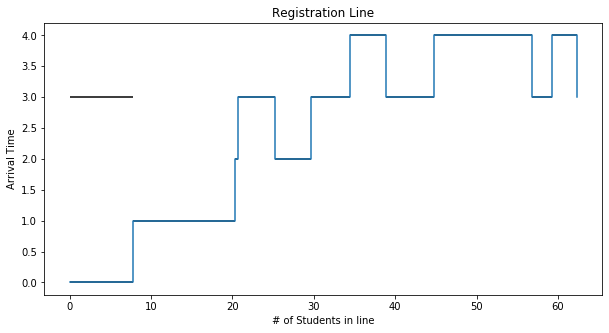

In [3]:
np.random.seed(32)
instances = markovChain()

plt.figure(figsize=(10,5))
plt.title('Registration Line')
plt.xlabel('# of Students in line')
plt.ylabel('Arrival Time')
plt.plot(instances[1],instances[0], drawstyle = 'steps-post')
plt.hlines(instances[0],instances[1][0:-1],instances[1][1:])

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

In [184]:
Q = np.matrix([[-1/4,1/4,0,0,0],
                [1/5,-9/20,1/4,0,0],
                [0,1/5,-9/20,1/4,0],
                [0,0,1/5,-9/20,1/4],
                [0,0,0,1/5,-1/5]])

Pt = scipy.linalg.expm(Q*math.pi) #from lectures P(t)= e^(Qt) and pi = t
print(Pt)


[[0.55524989 0.308565   0.10512926 0.02554735 0.00550851]
 [0.246852   0.3925013  0.24489947 0.08909819 0.02664905]
 [0.06728272 0.19591958 0.37967644 0.24578083 0.11134043]
 [0.01308024 0.05702284 0.19662467 0.39747023 0.33580202]
 [0.00225628 0.01364431 0.07125787 0.26864162 0.64419991]]
[-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]


'\nprint("Eigenvalues are:",\'\n\',v,\'\n\')\nprint("Eigenvectors are:",\'\n\',p,\'\n\')\nprint("Eigenvector for 0 is:",\'\n\',eigenvector0,\'\n\')\nprint("P(t) at t=pi is:",\'\n\',[1/5,1/5,1/5,1/5,1/5])\n'

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

In [223]:
v,p = np.linalg.eig(Q.T) #eigenvalues and vectors from Q transposed
eig = p[:,3] #the eigenvector from the eigenvalue = 0
Normalize = eig/sum(eig) #Normalizing pi so that when added together they equal 1
print("The stationaty distribution is:",'\n',Normalize,'\n')
print("The sum of the stationary distribution is:",sum(Normalize)) #checking that it equals 1

The stationaty distribution is: 
 [[0.12184674]
 [0.15230842]
 [0.19038553]
 [0.23798191]
 [0.29747739]] 

The sum of the stationary distribution is: [[1.]]


## Problem 2 (10 Points)

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain. 

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [222]:
q12 = 0.0151
q13 = 0.0071
q23 = 0.0284

def liver():
    time_list = []
    for simulation in range(100000):
        time = 0
        liver_disease = 1
        while liver_disease != 3: #when liver disease is not at stage 3 loop through
            if liver_disease == 1: 
                if np.random.exponential(1/q12) < np.random.exponential(1/q13): #if you go to stage 2 before stage 3
                    time += np.random.exponential((q12+q13)/q12) #waiting time of prob of going to stage 2 before 3
                    liver_disease = 2
                else:
                    time += np.random.exponential(1/q13) #time to go from stage 1 directly to stage 3
                    break #end loop
            if liver_disease == 2:
                time += np.random.exponential(1/q23) #time spent going from stage 2 to stage 3
                liver_disease = 3
        time_list.append(time) # append to a list to get all 100,000 instances
    time = np.array(time_list)
    return(time)
time = liver()
print("The mean time to death is:",statistics.mean(time), 'months.') #finds mean of 100,000 simulations

The mean time to death is: 69.83010381853697 months.


2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

In [175]:
V = np.matrix([[-(q12+q13),q12],
               [0,-q23]])
a1 = (1/(q12+q13))+q12/(q23*(q12+q13))
print("The theoretical mean time of death is:",a1)
print("The simulated mean time of death is:",statistics.mean(time))

The theoretical mean time of death is: 68.99505138941758
The simulated mean time of death is: 69.96898792705043
